In [1]:
from sklearn.metrics import mean_squared_error
from util import *
from utilLinealRegression import *

In [2]:
def load_normalized_data_set():
    # usualmente para evitar realizar las normalizacion de los datos cada vez que se realiza entrenamiento de modelos
    # se guarda los datos normalizados, su media y desviacion estandar en un archivo
    # esto es util cuando el dataset es muy grande y la normalizacion (o preparación de datos) es costosa.
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

In [3]:
def load_raw_data_set():
    return load_iris_data()

In [4]:
def train_lineal_regression_model(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent(x_train, y_train, learning_rate = lr, iterations = 1000)

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

## 1. Ejecutar el CASO DE ESTUDIO 1 y ajustar la tasa de aprendizaje

In [5]:
def study_case_1():
    lr_values = [0.01, 0.001, 0.05, 0.062]
    for lr in lr_values:
        # usar los datos crudos sin normalizar
        train_lineal_regression_model(study_case = 1, lr = lr)

Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


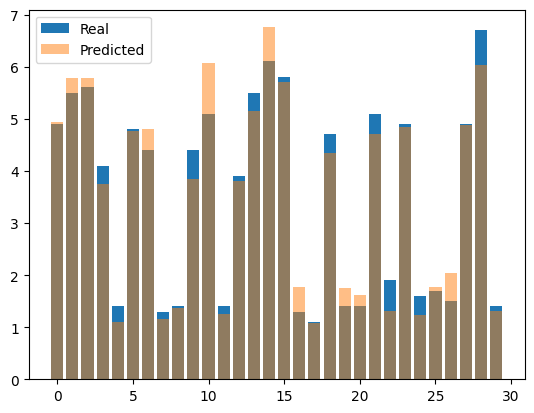

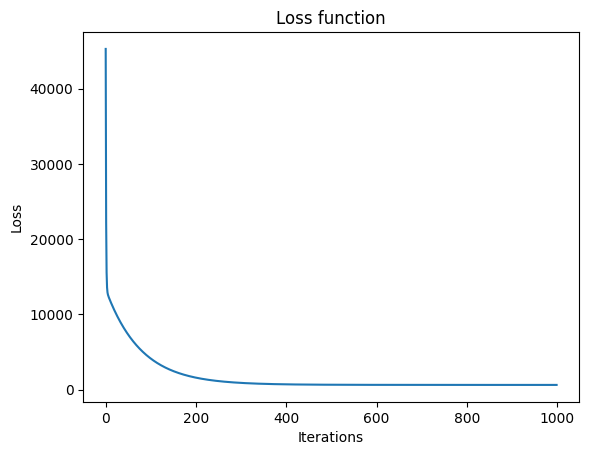

Mean Squared Error MSE: 				0.7
Mean Squared Error MSE percentage: 		12.499%
Mean Absolute Percentage Error MAPE: 	38.14%


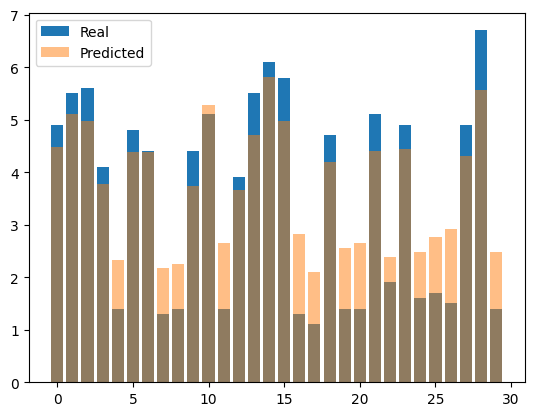

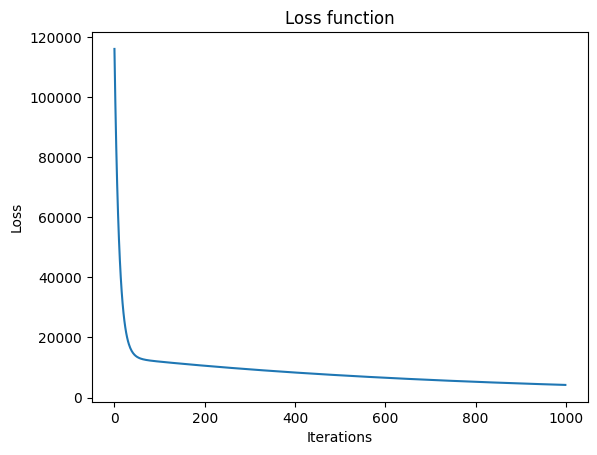

Mean Squared Error MSE: 				7.953208745260469e+256
Mean Squared Error MSE percentage: 		1.420215847367941e+258%
Mean Absolute Percentage Error MAPE: 	1.0989378456110843e+130%


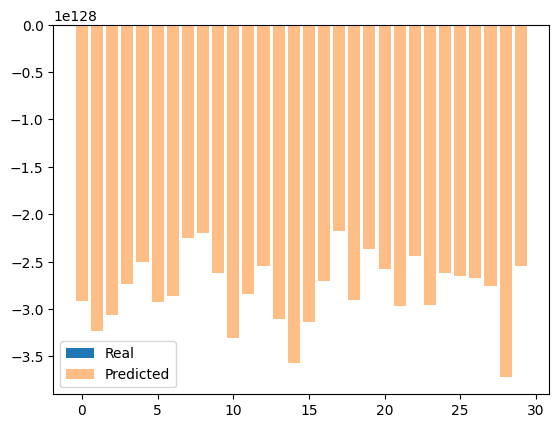

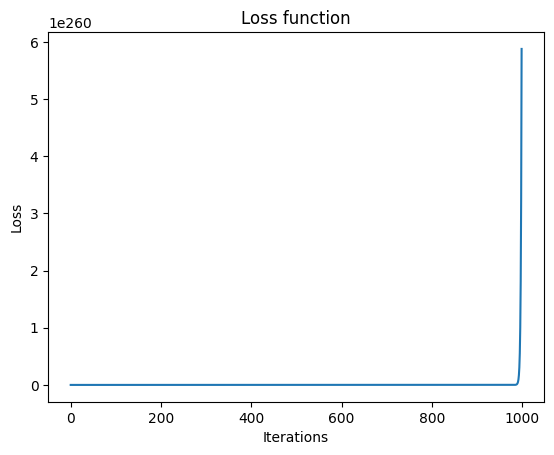

Mean Squared Error MSE: 				inf
Mean Squared Error MSE percentage: 		inf%
Mean Absolute Percentage Error MAPE: 	9.126804719024643e+281%


/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in scalar add
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in square
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


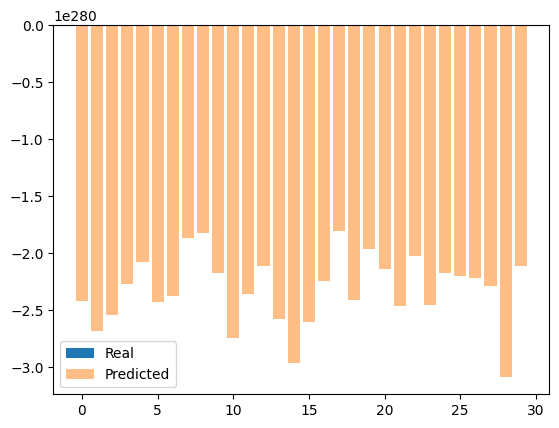

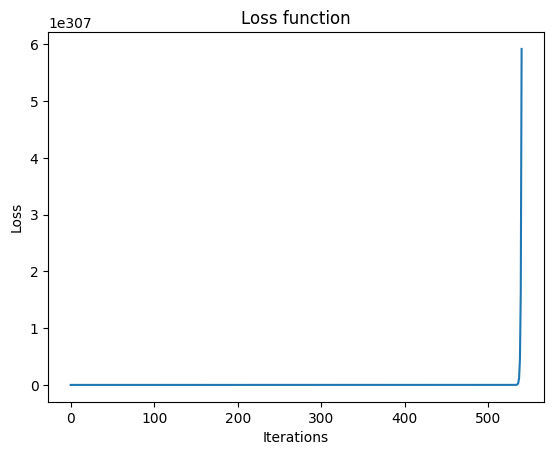

In [6]:
if __name__ == '__main__':
    study_case_1()

## 2. Implementar un nuevo criterio de parada basado en el costo

In [7]:
def gradient_descent_criterio_parada(x, y, learning_rate = 0.01, iterations = 1000, cost_threshold = 1e-6, seed = 123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])
    m = len(y)
    history = dict(cost = [], weights = [])
    for _ in range(iterations):
        # calculate the gradient
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        # update weights
        weights = weights - learning_rate * gradients
        # calculate the loss function
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        # CRITERIO DE PARADA BASADO EN EL VALOR DE COSTO (se detiene si es que el cambio en el costo es menor que el umbral)
        if len(history['cost']) > 1 and abs(history['cost'][-1] - history['cost'][-2]) < cost_threshold:
            print(f'Detención temprana en la iteración número: {_}')
            break
    return weights, history


In [14]:
def train_lineal_regression_model_modified(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')
    print (history['cost'][:5], len(history['cost']))

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [15]:
def study_case_1_part2():
    # lr_values = [0.01, 0.001, 0.05, 0.062]
    # for lr in lr_values:
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_modified(study_case = 1, lr = lr)

Pesos finales: [-0.11055983  0.76040764 -0.7388016   1.40302851]
Costo final: 645.6592346887134
[45261.33405656543, 22206.147668882273, 15577.364793614113, 13590.996641736625, 12917.704935086356] 1000
Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


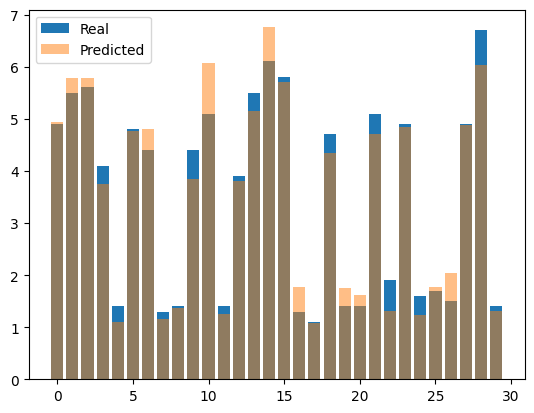

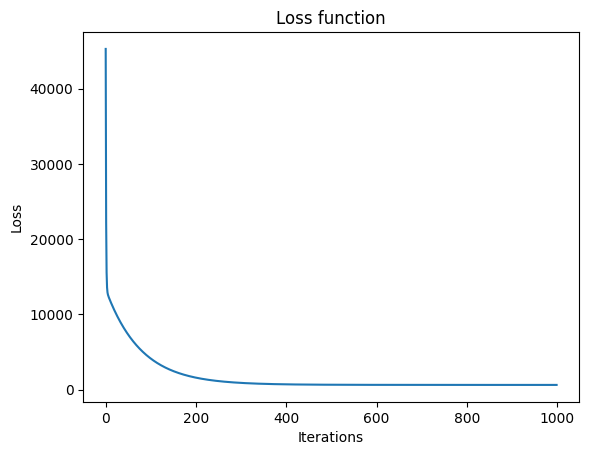

In [16]:
if __name__ == '__main__':
    study_case_1_part2()

## 3. Cambiar la variable objetivo

In [17]:
def load_iris_data_petalwidth_prediction():
    iris = load_iris()
    # We choose three features to predict one feature (Petal Width)
    x = iris.data[:, [0, 1, 2]]  # Sepal Length, Sepal Width, Petal Length
    # We assume that we want to predict the petal width
    y = iris.data[:, 3]  # PETAL WIDTH
    return x, y

In [18]:
def load_raw_data():
    return load_iris_data_petalwidth_prediction()

In [19]:
def train_lineal_regression_model_modified(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [20]:
def study_case_1_part3():
    # lr_values = [0.01, 0.001, 0.05, 0.062]
    # for lr in lr_values:
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_modified(study_case = 1, lr = lr)

Pesos finales: [-0.0459778  -0.10718261  0.05226022  0.45596988]
Costo final: 285.6263177161887
Mean Squared Error MSE: 				0.037
Mean Squared Error MSE percentage: 		1.678%
Mean Absolute Percentage Error MAPE: 	28.719%


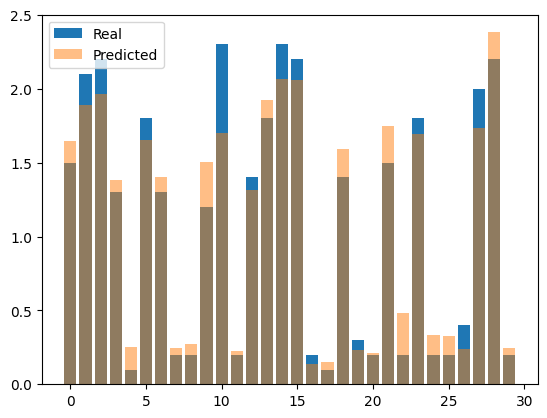

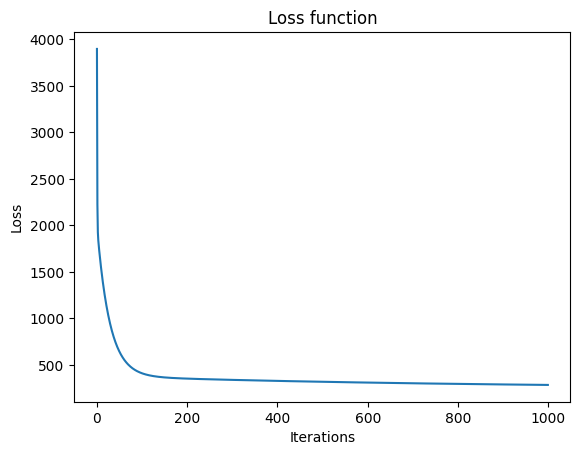

In [21]:
if __name__ == '__main__':
    study_case_1_part3()

## 4. Implementar normalización de datos (CASO DE ESTUDIO 2)

In [22]:
def study_case_2():
    lr = 0.01
    # usar los datos normalizados
    train_lineal_regression_model(study_case = 2, lr = lr)

Mean Squared Error MSE: 				0.047
Mean Squared Error MSE percentage: 		1.491%
Mean Absolute Percentage Error MAPE: 	26.278%


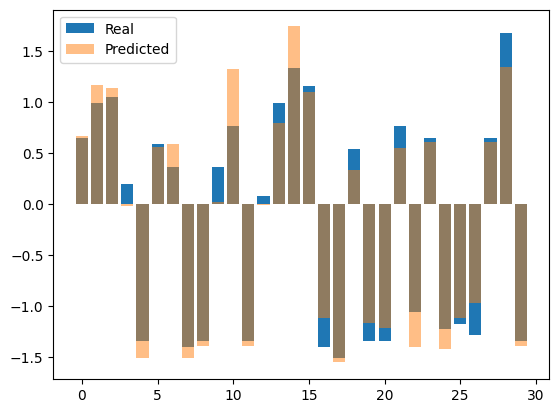

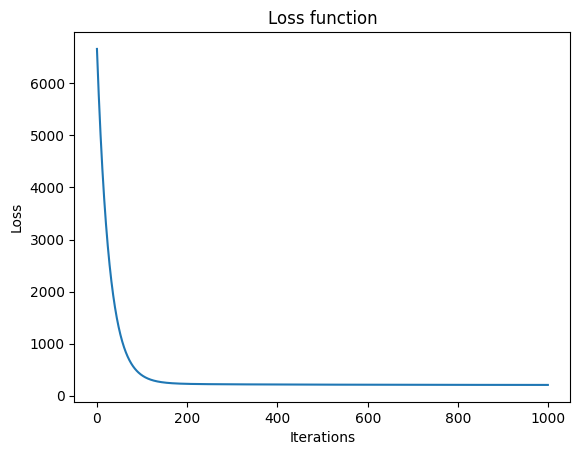

In [23]:
if __name__ == '__main__':
    study_case_2()

## 5. Reducir variables de entrada

In [24]:
def load_iris_data_reduced():
    iris = load_iris()
    # we choose TWO FEATURES to predict one feature (Petal Length)
    x = iris.data[:, [0, 1]]  # Sepal Length, Sepal Width
    # we assume that we want to predict the petal length
    y = iris.data[:, 2]  # Petal Length
    return x, y

In [25]:
def load_and_save_normalized_data_reduced():
    x, y = load_iris_data_reduced()

    # normalize data
    x_mean = x.mean(axis = 0)
    y_mean = y.mean()
    std_x = x.std(axis = 0)
    std_y = y.std()

    x = (x - x_mean) / std_x
    y = (y - y_mean) / std_y

    data = dict(x = x, y = y, x_mean = x_mean, y_mean = y_mean, std_x = std_x, std_y = std_y)
    # save data as pickle
    with open(normalized_file, 'wb') as f:
        pickle.dump(data, f)

    return data

In [26]:
def load_raw_data_reduced():
    return load_iris_data_reduced()

def load_normalized_data_reduced():
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_reduced()
    return read_normalized_data()

In [27]:
def train_lineal_regression_model_reduced(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_reduced()
    else:
        data = load_normalized_data_reduced()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [28]:
def study_case_1_reduced():
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_reduced(study_case = 1, lr = lr)

In [29]:
def study_case_2_reduced():
    lr = 0.01
    # usar los datos normalizados
    train_lineal_regression_model_reduced(study_case = 2, lr = lr)

Pesos finales: [-0.33725792  1.53483284 -1.5873994 ]
Costo final: 3276.3266339754364
Mean Squared Error MSE: 				0.46
Mean Squared Error MSE percentage: 		8.219%
Mean Absolute Percentage Error MAPE: 	22.134%


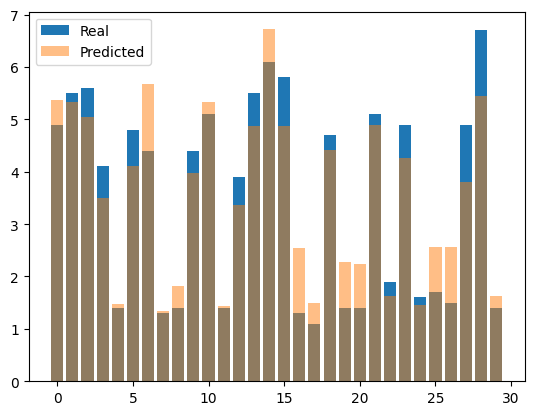

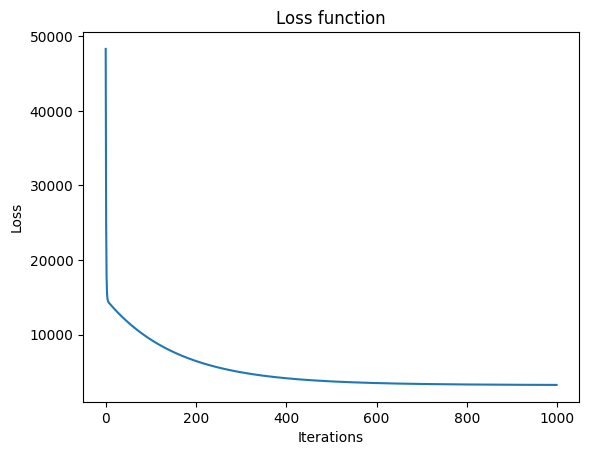

Pesos finales: [-0.00217594  0.38607785 -0.17369074  0.58665874]
Costo final: 207.9087562066715
Mean Squared Error MSE: 				0.047
Mean Squared Error MSE percentage: 		1.491%
Mean Absolute Percentage Error MAPE: 	26.278%


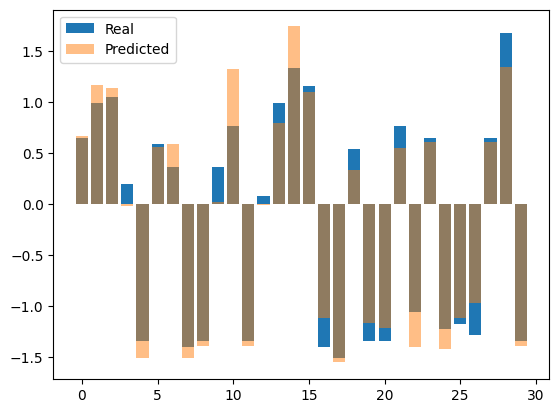

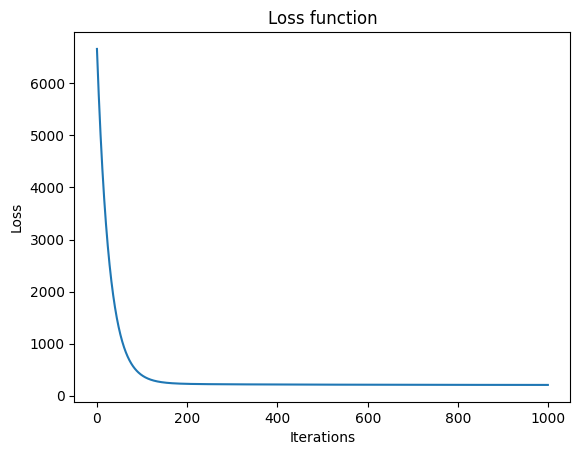

In [30]:
if __name__ == '__main__':
    study_case_1_reduced()
    study_case_2_reduced()

## 6. Pesos aleatorios vs pesos en cero (CASO DE ESTUDIO 3)

In [31]:
def gradient_descent_caso3(x, y, learning_rate = 0.01, iterations = 1000, cost_threshold = 1e-6, seed = 123):
    np.random.seed(seed)
    # CASO DE ESTUDIO 3
    weights = np.random.rand(x.shape[1]) # PESOS INICIALES ALEATORIOS

    m = len(y)
    history = dict(cost = [], weights = [])
    for _ in range(iterations):
        # calculate the gradient
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        # update weights
        weights = weights - learning_rate * gradients
        # calculate the loss function
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        # CRITERIO DE PARADA BASADO EN EL VALOR DE COSTO (se detiene si es que el cambio en el costo es menor que el umbral)
        if len(history['cost']) > 1 and abs(history['cost'][-1] - history['cost'][-2]) < cost_threshold:
            print(f'Detención temprana en la iteración número: {_}')
            break
    return weights, history

In [32]:
def train_lineal_regression_model(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_caso3(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [33]:
def study_case_3():
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case = 3, lr = lr)

Pesos finales: [-0.00183128  0.34871135 -0.16233013  0.62757158]
Costo final: 206.75914726118097
Mean Squared Error MSE: 				0.046
Mean Squared Error MSE percentage: 		1.433%
Mean Absolute Percentage Error MAPE: 	23.693%


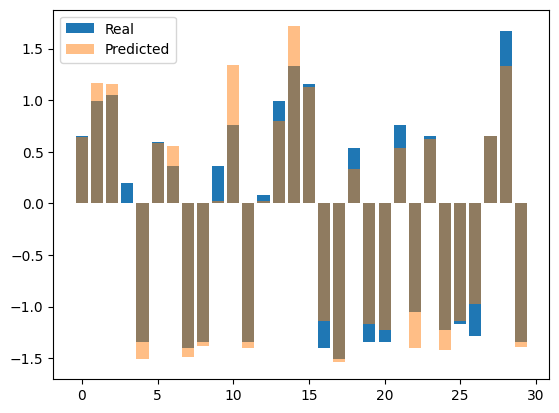

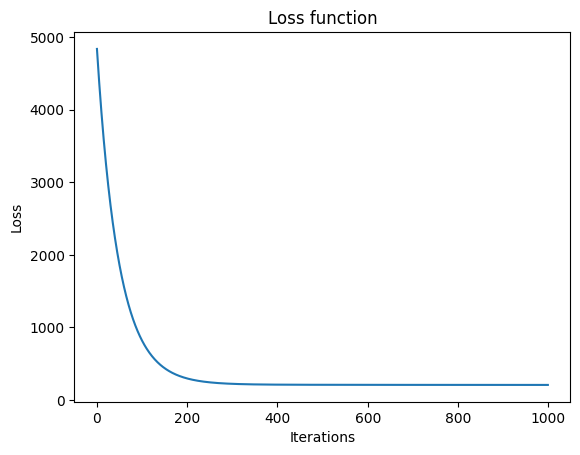

In [34]:
if __name__ == '__main__':
    study_case_3()

## 7. Implementación de diferentes tipos de gradiente descendente

In [35]:
def gradient_descent_type(x, y, learning_rate = 0.01, iterations = 1000, method = 'batch', batch_size = 32, seed = 123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])
    m = len(y)
    history = dict(cost = [], weights = [])

    for _ in range(iterations):
        if method == 'batch':
            # calculate the gradient
            gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        elif method == 'stochastic':
            for i in range(m):
                xi = x[i:i+1]
                yi = y[i:i+1]
                # calculate the gradient
                gradients = np.dot(xi.T, (np.dot(xi, weights) - yi))
        elif method == 'mini-batch':
            indices = np.random.permutation(m)
            x_shuffled = x[indices]
            y_shuffled = y[indices]
            for i in range(0, m, batch_size):
                xi = x_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                # calculate the gradient
                gradients = np.dot(xi.T, (np.dot(xi, weights) - yi)) / batch_size


        # update weights
        weights = weights - learning_rate * gradients
        # calculate the loss function
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
  
    return weights, history

In [36]:
def train_lineal_regression_model_type(study_case, lr, method):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_type(x_train, y_train, learning_rate = lr, iterations = 1000, method = method)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

### a) Batch Gradient Descendent

In [37]:
def study_case_1a():
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_type(study_case = 1, lr = lr, method = 'batch')

Pesos finales: [-0.11055983  0.76040764 -0.7388016   1.40302851]
Costo final: 645.6592346887134
Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


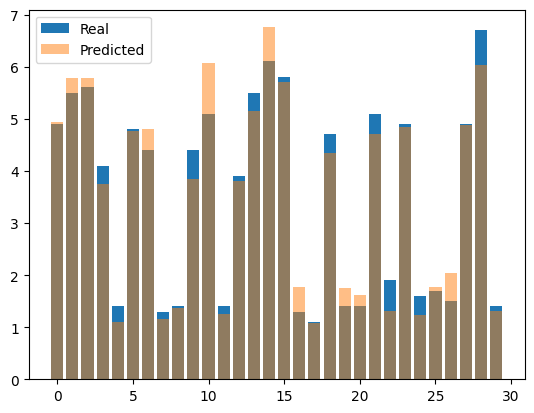

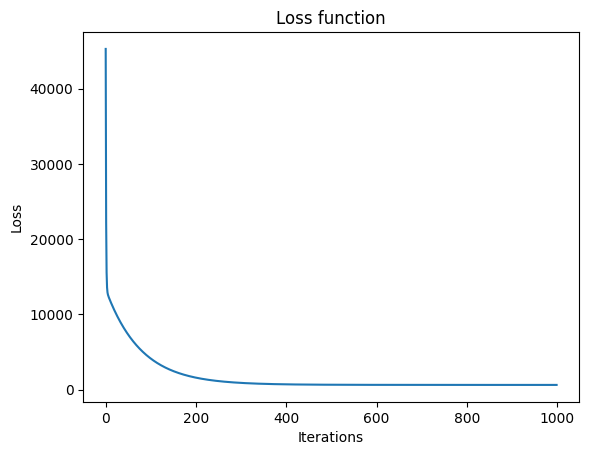

In [38]:
if __name__ == '__main__':
    study_case_1a()

### b) Stochastic Gradient Descendent

In [39]:
def study_case_1b():
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_type(study_case = 1, lr = lr, method = 'stochastic')

Pesos finales: [0.08466343 0.60957668 0.30478834 0.21165857]
Costo final: 18709.262038180947
Mean Squared Error MSE: 				3.4
Mean Squared Error MSE percentage: 		60.713%
Mean Absolute Percentage Error MAPE: 	87.33%


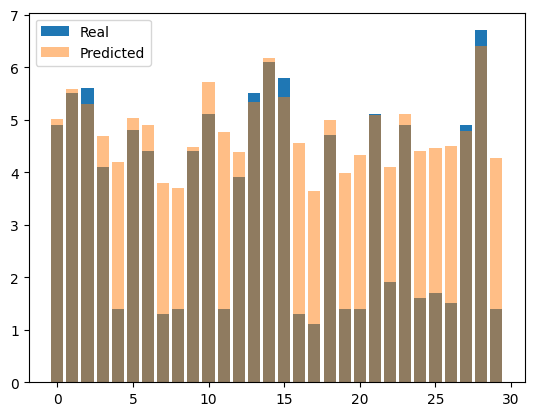

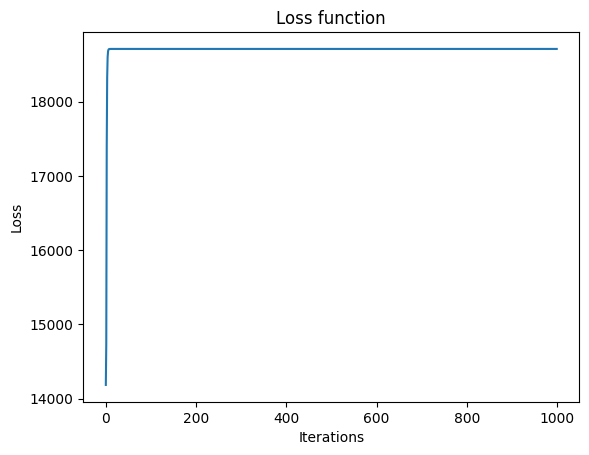

In [40]:
if __name__ == '__main__':
    study_case_1b()

### c) Mini-Batch Gradient Descendent

In [41]:
def study_case_1c():
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_type(study_case = 1, lr = lr, method = 'mini-batch')

Pesos finales: [-0.10050178  0.76455765 -0.74221203  1.38733551]
Costo final: 647.9946742608015
Mean Squared Error MSE: 				0.142
Mean Squared Error MSE percentage: 		2.538%
Mean Absolute Percentage Error MAPE: 	10.906%


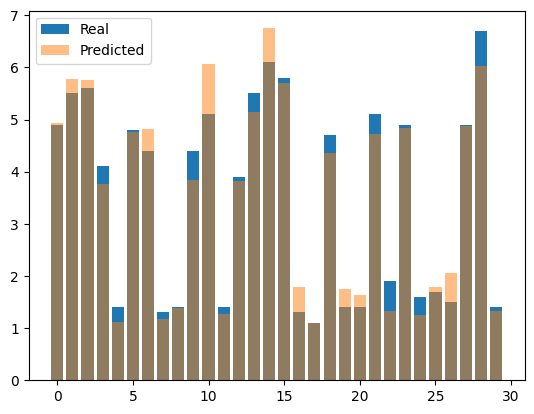

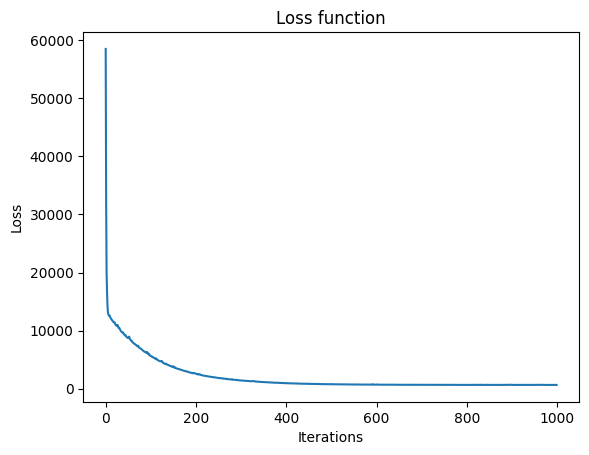

In [42]:
if __name__ == '__main__':
    study_case_1c()